In [14]:
!pip install scikit-learn
!pip3 install tensorflow_addons

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/719.8 kB ? eta -:--:--
     ---                                     61.4/719.8 kB 1.6 MB/s eta 0:00:01
     ----------                             194.6/719.8 kB 2.0 MB/s eta 0:00:01
     ------------------                     358.4/719.8 kB 2.5 MB/s eta 0:00:01
     -----------------------------          563.2/719.8 kB 2.7 MB/s eta 0:00:01
     -------------------------------------  716.8/719.8 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 719.8/719.8 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

In [7]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

In [8]:
# Select numeric columns using the 'select_dtypes()' method
df_train = df_train.select_dtypes(include=['int64', 'float64'])
df_test = df_test.select_dtypes(include=['int64', 'float64'])

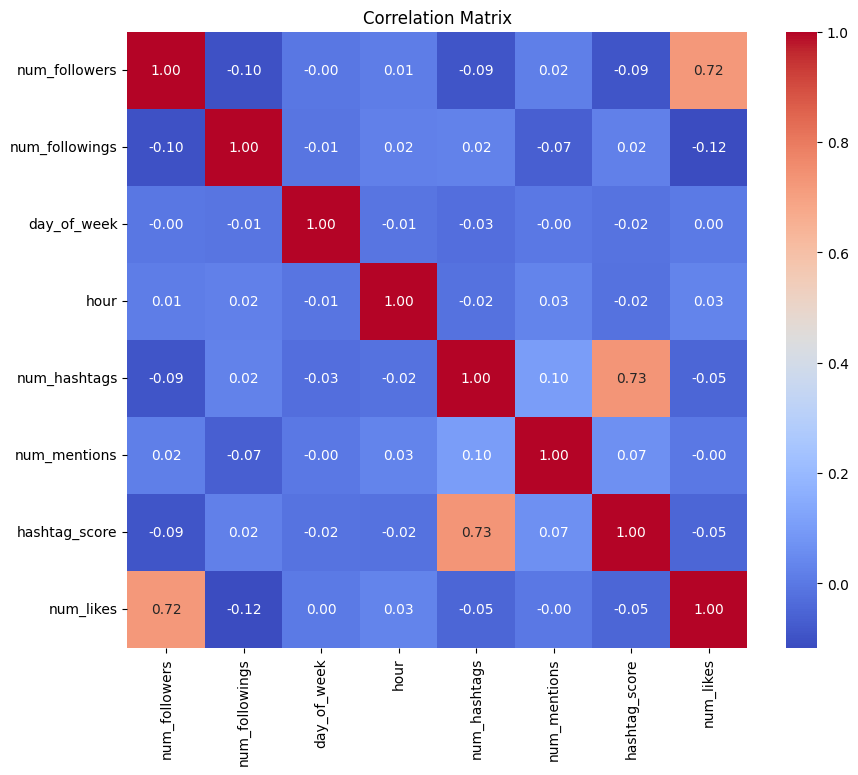

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Prepare the data
X_train, X_test = df_train.iloc[:, :-1], df_test.iloc[:, :-1]  # Features (all columns except the last one)
y_train, y_test = df_train.iloc[:, -1], df_test.iloc[:, -1]   # Target variable (last column)

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(random_state=1, max_iter=500)
]

# Create an empty list to store the evaluation results
results_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the model evaluation results as a dictionary to the list
    results_list.append({
        'Model': model_name,
        'MAPE': mape,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame with the model evaluation results
results_df

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MAPE,MSE,MAE,R2
0,LinearRegression,1.768291,1.658182e+07,1600.066573,0.491037
1,Ridge,1.768482,1.658202e+07,1600.067429,0.491031
2,Lasso,1.769088,1.658246e+07,1599.862189,0.491017
3,ElasticNet,2.703655,1.890614e+07,1693.738131,0.419694
4,DecisionTreeRegressor,0.531394,1.020468e+07,911.717347,0.686777
5,RandomForestRegressor,0.474307,7.284383e+06,731.274814,0.776413
6,GradientBoostingRegressor,1.666440,8.673502e+06,1179.790965,0.733775
7,KNeighborsRegressor,1.621022,1.092649e+07,1352.149093,0.664622
8,MLPRegressor,1.805338,1.636557e+07,1549.939792,0.497674


In [20]:
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_addons.metrics import RSquare

# Ignore all warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# Define custom metrics
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mape = tf.keras.metrics.MeanAbsolutePercentageError()

# Compile model with the custom metrics
model.compile(loss='mse', optimizer='rmsprop', metrics=[RSquare(), mse, mae, mape])

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
393/393 [==============================] - 8s 9ms/step - loss: 26958014.0000 - r_square: -0.1777 - mean_squared_error: 26958014.0000 - mean_absolute_error: 2158.9207 - mean_absolute_percentage_error: 90.3087 - val_loss: 33300452.0000 - val_r_square: -0.0221 - val_mean_squared_error: 33300452.0000 - val_mean_absolute_error: 1974.3269 - val_mean_absolute_percentage_error: 123.1004
Epoch 2/100
393/393 [==============================] - 3s 8ms/step - loss: 18448278.0000 - r_square: 0.1941 - mean_squared_error: 18448278.0000 - mean_absolute_error: 1866.3900 - mean_absolute_percentage_error: 287.4349 - val_loss: 22637554.0000 - val_r_square: 0.3052 - val_mean_squared_error: 22637554.0000 - val_mean_absolute_error: 2027.5630 - val_mean_absolute_percentage_error: 375.0197
Epoch 3/100
393/393 [==============================] - 3s 7ms/step - loss: 13385173.0000 - r_square: 0.4153 - mean_squared_error: 13385173.0000 - mean_absolute_error: 1826.1177 - mean_absolute_percentage_error: 35

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                640       
                                                                 
 dense_17 (Dense)            (None, 30)                2430      
                                                                 
 dense_18 (Dense)            (None, 10)                310       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3391 (13.25 KB)
Trainable params: 3391 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
